In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None) # display all columns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# Setting Custom colors
my_colors = ["#ff6e54", "#ffa600", "#ff2e63", "#a3f7bf", "#9378ff", "#56e39f", "#ff67ab", "#5e2ca5", "#ffd166", "#00b4d8", "#4ecdc4", "#f8edeb"]
my_palette = sns.color_palette(my_colors) # Create a seaborn palette object
sns.set_palette(my_palette)  # Use the custom palette with a seaborn function
from matplotlib.colors import ListedColormap
colors = ['#ffc3a0', '#ffafcc', '#bde0fe', '#ffabab']
my_cmap = sns.color_palette(colors)
cmap = ListedColormap(colors)

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# train = pd.read_csv('/kaggle/input/attrition-dataset/train.csv')
train = pd.read_csv('train.csv')
# test = pd.read_csv('/kaggle/input/attrition-dataset/test.csv')
test = pd.read_csv('test.csv')
# add_train = pd.read_csv('/kaggle/input/attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
add_train = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

display(train.head(), test.head(), add_train.head())

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,Male,43,3,1,Laboratory Technician,3,Single,2318,17778,1,Y,No,12,3,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,Male,67,3,2,Sales Executive,1,Divorced,5486,12421,6,Y,Yes,12,3,3,80,1,7,3,3,2,2,2,2
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,Male,41,3,1,Research Scientist,4,Divorced,2741,23577,4,Y,Yes,13,3,2,80,2,13,2,2,7,7,1,7
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,Male,89,2,2,Healthcare Representative,3,Single,5228,20364,1,Y,No,13,3,3,80,0,14,2,2,14,10,11,8
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,Male,79,3,1,Laboratory Technician,4,Single,1223,15178,1,Y,No,14,3,1,80,0,1,5,3,1,0,0,0


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
train.shape, test.shape, add_train.shape

((1677, 35), (1119, 34), (1470, 35))

In [5]:
train.columns = train.columns.str.replace(' ', '')
test.columns = test.columns.str.replace(' ', '')
add_train.columns = add_train.columns.str.replace(' ', '')

In [6]:
data = [train, test, add_train]
for i in data:
    print(i.info())
    print('-' *100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [7]:
# different column names

set(train.columns) ^ set(add_train.columns)

{'EmployeeNumber', 'id'}

In [8]:
common_columns = set(train.columns) & set(add_train.columns)
common_columns = list(common_columns)

# Select only the common columns for both data frames
train = train[common_columns]
add_train = add_train[common_columns]

In [9]:
# Check if the columns are the same
if set(add_train.columns) == set(train.columns):
    print("Columns in train and add_train are the same.")
else:
    different_columns = set(train.columns).symmetric_difference(set(add_train.columns))
    print("Columns in train and add_train are different.")
    print("Different columns:", different_columns)

Columns in train and add_train are the same.


In [10]:
train.shape, add_train.shape

((1677, 34), (1470, 34))

In [11]:
display(train.head(), add_train.head())

,JobRole,Gender,PercentSalaryHike,Over18,DistanceFromHome,BusinessTravel,WorkLifeBalance,StandardHours,EmployeeCount,MonthlyIncome,YearsWithCurrManager,YearsAtCompany,EnvironmentSatisfaction,Department,Age,OverTime,Attrition,TrainingTimesLastYear,JobSatisfaction,StockOptionLevel,RelationshipSatisfaction,YearsSinceLastPromotion,YearsInCurrentRole,JobInvolvement,JobLevel,NumCompaniesWorked,PerformanceRating,EducationField,HourlyRate,MaritalStatus,TotalWorkingYears,DailyRate,Education,MonthlyRate
0,Laboratory Technician,Male,13,Y,24,Travel_Frequently,3,80,1,2596,8,10,4,Research & Development,36,Yes,0,2,4,1,2,7,0,3,1,1,3,Medical,42,Married,10,599,3,5099
1,Sales Representative,Male,17,Y,8,Travel_Rarely,3,80,1,2899,3,4,1,Sales,35,No,0,3,1,1,4,0,2,3,1,1,3,Other,46,Married,4,921,3,10778
2,Sales Executive,Male,17,Y,26,Travel_Rarely,3,80,1,4627,2,3,3,Sales,32,No,0,3,4,2,4,1,2,3,2,0,3,Marketing,80,Divorced,4,718,3,16495
3,Healthcare Representative,Female,14,Y,2,Travel_Rarely,1,80,1,5347,2,6,3,Research & Development,38,No,0,1,1,0,3,0,0,3,2,3,3,Medical,40,Married,15,1488,3,13384
4,Manager,Female,13,Y,5,Travel_Rarely,3,80,1,19033,10,31,2,Research & Development,50,Yes,1,0,1,0,3,4,14,3,5,1,3,Medical,37,Single,31,1017,4,19805


,JobRole,Gender,PercentSalaryHike,Over18,DistanceFromHome,BusinessTravel,WorkLifeBalance,StandardHours,EmployeeCount,MonthlyIncome,YearsWithCurrManager,YearsAtCompany,EnvironmentSatisfaction,Department,Age,OverTime,Attrition,TrainingTimesLastYear,JobSatisfaction,StockOptionLevel,RelationshipSatisfaction,YearsSinceLastPromotion,YearsInCurrentRole,JobInvolvement,JobLevel,NumCompaniesWorked,PerformanceRating,EducationField,HourlyRate,MaritalStatus,TotalWorkingYears,DailyRate,Education,MonthlyRate
0,Sales Executive,Female,11,Y,1,Travel_Rarely,1,80,1,5993,5,6,2,Sales,41,Yes,Yes,0,4,0,1,0,4,3,2,8,3,Life Sciences,94,Single,8,1102,2,19479
1,Research Scientist,Male,23,Y,8,Travel_Frequently,3,80,1,5130,7,10,3,Research & Development,49,No,No,3,2,1,4,1,7,2,2,1,4,Life Sciences,61,Married,10,279,1,24907
2,Laboratory Technician,Male,15,Y,2,Travel_Rarely,3,80,1,2090,0,0,4,Research & Development,37,Yes,Yes,3,3,0,2,0,0,2,1,6,3,Other,92,Single,7,1373,2,2396
3,Research Scientist,Female,11,Y,3,Travel_Frequently,3,80,1,2909,0,8,4,Research & Development,33,Yes,No,3,3,0,3,3,7,3,1,1,3,Life Sciences,56,Married,8,1392,4,23159
4,Laboratory Technician,Male,12,Y,2,Travel_Rarely,3,80,1,3468,2,2,1,Research & Development,27,No,No,3,2,1,4,2,2,3,1,9,3,Medical,40,Married,6,591,1,16632


In [12]:
target = [train, add_train]
for i in target:
    print(i['Attrition'].value_counts())

Attrition
0    1477
1     200
Name: count, dtype: int64
Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [13]:
print(train.duplicated().sum())
print(test.duplicated().sum())
print(add_train.duplicated().sum())

0
0
0


In [14]:
for i in train.select_dtypes(exclude='number').columns:
    print(train[i].value_counts())
    print(100 * '-')

JobRole
Sales Executive              355
Research Scientist           344
Laboratory Technician        334
Manufacturing Director       196
Healthcare Representative    155
Manager                      111
Sales Representative          77
Research Director             71
Human Resources               34
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Gender
Male      1064
Female     613
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Over18
Y    1677
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
BusinessTravel
Travel_Rarely        1290
Travel_Frequently     261
Non-Travel            126
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Department
Research & Development    116

In [15]:
for i in add_train.select_dtypes(exclude='number').columns:
    print(add_train[i].value_counts())
    print(100 * '-')

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Gender
Male      882
Female    588
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Over18
Y    1470
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Department
Research & Development    961
S

In [16]:
for i in test.select_dtypes(exclude='number').columns:
    print(test[i].value_counts())
    print(100 * '-')

BusinessTravel
Travel_Rarely        799
Travel_Frequently    212
Non-Travel           108
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Department
Research & Development    777
Sales                     306
Human Resources            36
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
EducationField
Life Sciences       519
Medical             345
Marketing           102
Technical Degree     96
Other                45
Human Resources      12
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Gender
Male      690
Female    429
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
JobRole
Sales Executive              240
Laboratory Technician        230
Research Scientist           230


In [17]:
# encode attrition in add_train to numerical
from sklearn.preprocessing import LabelEncoder
add_train['Attrition'] = add_train['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
print(train.columns.tolist());print()
print(add_train.columns.tolist())

['JobRole', 'Gender', 'PercentSalaryHike', 'Over18', 'DistanceFromHome', 'BusinessTravel', 'WorkLifeBalance', 'StandardHours', 'EmployeeCount', 'MonthlyIncome', 'YearsWithCurrManager', 'YearsAtCompany', 'EnvironmentSatisfaction', 'Department', 'Age', 'OverTime', 'Attrition', 'TrainingTimesLastYear', 'JobSatisfaction', 'StockOptionLevel', 'RelationshipSatisfaction', 'YearsSinceLastPromotion', 'YearsInCurrentRole', 'JobInvolvement', 'JobLevel', 'NumCompaniesWorked', 'PerformanceRating', 'EducationField', 'HourlyRate', 'MaritalStatus', 'TotalWorkingYears', 'DailyRate', 'Education', 'MonthlyRate']

['JobRole', 'Gender', 'PercentSalaryHike', 'Over18', 'DistanceFromHome', 'BusinessTravel', 'WorkLifeBalance', 'StandardHours', 'EmployeeCount', 'MonthlyIncome', 'YearsWithCurrManager', 'YearsAtCompany', 'EnvironmentSatisfaction', 'Department', 'Age', 'OverTime', 'Attrition', 'TrainingTimesLastYear', 'JobSatisfaction', 'StockOptionLevel', 'RelationshipSatisfaction', 'YearsSinceLastPromotion', 'Ye

In [19]:
# concatenate train and add_train

common_columns = list(set(train.columns) & set(add_train.columns))

# Concatenate and keep only common columns
concatenated_train = pd.concat([train[common_columns], add_train[common_columns]], ignore_index=True)

# Drop duplicates based on all common columns
concatenated_train = concatenated_train.drop_duplicates()
concatenated_train.head()

,JobRole,Gender,PercentSalaryHike,Over18,DistanceFromHome,BusinessTravel,WorkLifeBalance,StandardHours,EmployeeCount,MonthlyIncome,YearsWithCurrManager,YearsAtCompany,EnvironmentSatisfaction,Department,Age,OverTime,Attrition,TrainingTimesLastYear,JobSatisfaction,StockOptionLevel,RelationshipSatisfaction,YearsSinceLastPromotion,YearsInCurrentRole,JobInvolvement,JobLevel,NumCompaniesWorked,PerformanceRating,EducationField,HourlyRate,MaritalStatus,TotalWorkingYears,DailyRate,Education,MonthlyRate
0,Laboratory Technician,Male,13,Y,24,Travel_Frequently,3,80,1,2596,8,10,4,Research & Development,36,Yes,0,2,4,1,2,7,0,3,1,1,3,Medical,42,Married,10,599,3,5099
1,Sales Representative,Male,17,Y,8,Travel_Rarely,3,80,1,2899,3,4,1,Sales,35,No,0,3,1,1,4,0,2,3,1,1,3,Other,46,Married,4,921,3,10778
2,Sales Executive,Male,17,Y,26,Travel_Rarely,3,80,1,4627,2,3,3,Sales,32,No,0,3,4,2,4,1,2,3,2,0,3,Marketing,80,Divorced,4,718,3,16495
3,Healthcare Representative,Female,14,Y,2,Travel_Rarely,1,80,1,5347,2,6,3,Research & Development,38,No,0,1,1,0,3,0,0,3,2,3,3,Medical,40,Married,15,1488,3,13384
4,Manager,Female,13,Y,5,Travel_Rarely,3,80,1,19033,10,31,2,Research & Development,50,Yes,1,0,1,0,3,4,14,3,5,1,3,Medical,37,Single,31,1017,4,19805


In [20]:
concatenated_train.shape, test.shape

((3147, 34), (1119, 34))

In [21]:
print(concatenated_train.columns.tolist());print()
print(test.columns.tolist())

['JobRole', 'Gender', 'PercentSalaryHike', 'Over18', 'DistanceFromHome', 'BusinessTravel', 'WorkLifeBalance', 'StandardHours', 'EmployeeCount', 'MonthlyIncome', 'YearsWithCurrManager', 'YearsAtCompany', 'EnvironmentSatisfaction', 'Department', 'Age', 'OverTime', 'Attrition', 'TrainingTimesLastYear', 'JobSatisfaction', 'StockOptionLevel', 'RelationshipSatisfaction', 'YearsSinceLastPromotion', 'YearsInCurrentRole', 'JobInvolvement', 'JobLevel', 'NumCompaniesWorked', 'PerformanceRating', 'EducationField', 'HourlyRate', 'MaritalStatus', 'TotalWorkingYears', 'DailyRate', 'Education', 'MonthlyRate']

['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction

In [22]:
# Specify the order of columns including "Attrition"
desired_order = concatenated_train.columns.tolist()

# Exclude 'Attrition' from the order
desired_order.remove('Attrition')

# Filter and reorder columns in test
test = test[desired_order]
print("Aligned test columns:", test.columns.tolist())

Aligned test columns: ['JobRole', 'Gender', 'PercentSalaryHike', 'Over18', 'DistanceFromHome', 'BusinessTravel', 'WorkLifeBalance', 'StandardHours', 'EmployeeCount', 'MonthlyIncome', 'YearsWithCurrManager', 'YearsAtCompany', 'EnvironmentSatisfaction', 'Department', 'Age', 'OverTime', 'TrainingTimesLastYear', 'JobSatisfaction', 'StockOptionLevel', 'RelationshipSatisfaction', 'YearsSinceLastPromotion', 'YearsInCurrentRole', 'JobInvolvement', 'JobLevel', 'NumCompaniesWorked', 'PerformanceRating', 'EducationField', 'HourlyRate', 'MaritalStatus', 'TotalWorkingYears', 'DailyRate', 'Education', 'MonthlyRate']


In [23]:
concatenated_train.head(2)

,JobRole,Gender,PercentSalaryHike,Over18,DistanceFromHome,BusinessTravel,WorkLifeBalance,StandardHours,EmployeeCount,MonthlyIncome,YearsWithCurrManager,YearsAtCompany,EnvironmentSatisfaction,Department,Age,OverTime,Attrition,TrainingTimesLastYear,JobSatisfaction,StockOptionLevel,RelationshipSatisfaction,YearsSinceLastPromotion,YearsInCurrentRole,JobInvolvement,JobLevel,NumCompaniesWorked,PerformanceRating,EducationField,HourlyRate,MaritalStatus,TotalWorkingYears,DailyRate,Education,MonthlyRate
0,Laboratory Technician,Male,13,Y,24,Travel_Frequently,3,80,1,2596,8,10,4,Research & Development,36,Yes,0,2,4,1,2,7,0,3,1,1,3,Medical,42,Married,10,599,3,5099
1,Sales Representative,Male,17,Y,8,Travel_Rarely,3,80,1,2899,3,4,1,Sales,35,No,0,3,1,1,4,0,2,3,1,1,3,Other,46,Married,4,921,3,10778


In [24]:
test.head(2)

,JobRole,Gender,PercentSalaryHike,Over18,DistanceFromHome,BusinessTravel,WorkLifeBalance,StandardHours,EmployeeCount,MonthlyIncome,YearsWithCurrManager,YearsAtCompany,EnvironmentSatisfaction,Department,Age,OverTime,TrainingTimesLastYear,JobSatisfaction,StockOptionLevel,RelationshipSatisfaction,YearsSinceLastPromotion,YearsInCurrentRole,JobInvolvement,JobLevel,NumCompaniesWorked,PerformanceRating,EducationField,HourlyRate,MaritalStatus,TotalWorkingYears,DailyRate,Education,MonthlyRate
0,Laboratory Technician,Male,12,Y,1,Non-Travel,2,80,1,2318,0,1,4,Research & Development,19,No,2,3,0,4,0,0,3,1,1,3,Medical,43,Single,1,992,1,17778
1,Sales Executive,Male,12,Y,4,Travel_Rarely,3,80,1,5486,2,2,3,Sales,45,Yes,3,1,1,3,2,2,3,2,6,3,Marketing,67,Divorced,7,1136,4,12421


In [25]:
concatenated_train.shape, test.shape

((3147, 34), (1119, 33))

In [26]:
data = [concatenated_train, test]
for i in data:
    print(i.info())
    print('-' *100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   JobRole                   3147 non-null   object
 1   Gender                    3147 non-null   object
 2   PercentSalaryHike         3147 non-null   int64 
 3   Over18                    3147 non-null   object
 4   DistanceFromHome          3147 non-null   int64 
 5   BusinessTravel            3147 non-null   object
 6   WorkLifeBalance           3147 non-null   int64 
 7   StandardHours             3147 non-null   int64 
 8   EmployeeCount             3147 non-null   int64 
 9   MonthlyIncome             3147 non-null   int64 
 10  YearsWithCurrManager      3147 non-null   int64 
 11  YearsAtCompany            3147 non-null   int64 
 12  EnvironmentSatisfaction   3147 non-null   int64 
 13  Department                3147 non-null   object
 14  Age                     

## EDA

In [27]:
concatenated_train.select_dtypes(exclude='number').columns

Index(['JobRole', 'Gender', 'Over18', 'BusinessTravel', 'Department',
       'OverTime', 'EducationField', 'MaritalStatus'],
      dtype='object')

In [28]:
# review = concatenated_train[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
#                 'Over18', 'OverTime', 'MaritalStatus', 'Attrition']]
# for i in review.columns:
#     plt.figure(figsize=(8, 5))
#     sns.barplot(x=review[i].value_counts().index, y=review[i].value_counts()).set_title(i)
#     plt.show()

In [29]:
# for i in concatenated_train.select_dtypes(include='number').columns:
#     plt.figure(figsize=(8, 5))
#     sns.histplot(train[i])
#     plt.show();

In [30]:
# for i in concatenated_train.select_dtypes(include='number').columns:
#     plt.figure(figsize=(8, 5))
#     sns.boxplot(y=train[i])
#     plt.xlabel(i)
#     plt.show();

## Feature Engineering

In [31]:
print(concatenated_train.shape, test.shape)

(3147, 34) (1119, 33)


Explanation of the columns in the dataset:

1. **id:** Unique identifier for each employee.

2. **Age:** The age of the employee.

3. **BusinessTravel:** The frequency of business travel. This could be "Non-Travel," "Travel_Rarely," or "Travel_Frequently."

4. **DailyRate:** The daily rate of pay for the employee.

5. **Department:** The department in which the employee works ('Research & Development', 'Sales', 'Human Resources').

6. **DistanceFromHome:** The distance of the employee's home from the workplace.

7. **Education:** The level of education achieved by the employee.

8. **EducationField:** The field of education of the employee ('Medical', 'Other', 'Marketing', 'Life Sciences', 'Technical Degree', 'Human Resources').

9. **EmployeeCount:** The count of employees. This column seems to have a constant value and may be dropped as it doesn't provide useful information.

10. **EnvironmentSatisfaction:** Employee's satisfaction with their work environment.

11. **Gender:** The gender of the employee.

12. **HourlyRate:** The hourly rate of pay for the employee.

13. **JobInvolvement:** The level of job involvement.

14. **JobLevel:** The level of the employee's job within the company hierarchy.

15. **JobRole:** The role/title of the employee ('Laboratory Technician', 'Sales Representative', 'Sales Executive',
       'Healthcare Representative', 'Manager', 'Manufacturing Director',
       'Research Scientist', 'Human Resources', 'Research Director').

16. **JobSatisfaction:** Employee's satisfaction with their job.

17. **MaritalStatus:** The marital status of the employee ('Married', 'Divorced', 'Single').

18. **MonthlyIncome:** The monthly income of the employee.

19. **MonthlyRate:** The monthly rate of pay for the employee.

20. **NumCompaniesWorked:** The number of companies the employee has worked for.

21. **Over18:** Indicates if the employee is over 18 years old. This column may be dropped if all values are the same.

22. **OverTime:** Whether the employee works overtime or not.

23. **PercentSalaryHike:** The percentage increase in salary.

24. **PerformanceRating:** The performance rating of the employee.

25. **RelationshipSatisfaction:** Employee's satisfaction with their relationships at work.

26. **StandardHours:** The standard number of working hours.

27. **StockOptionLevel:** The level of stock options granted to the employee.

28. **TotalWorkingYears:** The total number of years the employee has been working.

29. **TrainingTimesLastYear:** The number of training times the employee attended last year.

30. **WorkLifeBalance:** Employee's perception of work-life balance.

31. **YearsAtCompany:** The number of years the employee has spent at the current company.

32. **YearsInCurrentRole:** The number of years the employee has been in the current role.

33. **YearsSinceLastPromotion:** The number of years since the last promotion.

34. **YearsWithCurrManager:** The number of years the employee has been with the current manager.

35. **Attrition:** The target variable indicating whether the employee has attrited (left the company) or not "Yes" or "No."

In [32]:
train_df = concatenated_train.copy()
test_df = test.copy()

# # Income to DailyRate Ratio
# train_df['IncomeToDailyRateRatio'] = concatenated_train['MonthlyIncome'] / concatenated_train['DailyRate']
# test_df['IncomeToDailyRateRatio'] = test['MonthlyIncome'] / test['DailyRate']

# # Education and JobLevel Interaction
# train_df['EduJobInteraction'] = concatenated_train['Education'] * concatenated_train['JobLevel']
# test_df['EduJobInteraction'] = test['Education'] * test['JobLevel']

# # Income per Year of Experience
# train_df['IncomePerExperience'] = concatenated_train['MonthlyIncome'] / concatenated_train['TotalWorkingYears']
# test_df['IncomePerExperience'] = test_df['MonthlyIncome'] / test_df['TotalWorkingYears']

# Job Change Rate
# train_df['JobChangeRate'] = concatenated_train['NumCompaniesWorked'] / concatenated_train['TotalWorkingYears']
# test_df['JobChangeRate'] = test_df['NumCompaniesWorked'] / test_df['TotalWorkingYears']

# # Tenure-to-Age Ratio
# train_df['TenureToAgeRatio'] = concatenated_train['TotalWorkingYears'] / concatenated_train['Age']
# test_df['TenureToAgeRatio'] = test_df['TotalWorkingYears'] / test_df['Age']

# # Total Satisfaction Score
# train_df['TotalSatisfaction'] = concatenated_train['EnvironmentSatisfaction'] + concatenated_train['JobSatisfaction'] + concatenated_train['RelationshipSatisfaction']
# test_df['TotalSatisfaction'] = test['EnvironmentSatisfaction'] + test['JobSatisfaction'] + test['RelationshipSatisfaction']

# # Round floats
# train_df[['IncomeToDailyRateRatio']] = train_df[['IncomeToDailyRateRatio']].round(2)
# test_df[['IncomeToDailyRateRatio']] = test_df[['IncomeToDailyRateRatio']].round(2)
# train_df[['TenureToAgeRatio']] = train_df[['TenureToAgeRatio']].round(2)
# test_df[['TenureToAgeRatio']] = test_df[['TenureToAgeRatio']].round(2)

# Remove redundant columns
train_df = train_df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)
test_df = test_df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

display(train_df.head())
display(test_df.head())

,JobRole,Gender,PercentSalaryHike,DistanceFromHome,BusinessTravel,WorkLifeBalance,MonthlyIncome,YearsWithCurrManager,YearsAtCompany,EnvironmentSatisfaction,Department,Age,OverTime,Attrition,TrainingTimesLastYear,JobSatisfaction,StockOptionLevel,RelationshipSatisfaction,YearsSinceLastPromotion,YearsInCurrentRole,JobInvolvement,JobLevel,NumCompaniesWorked,PerformanceRating,EducationField,HourlyRate,MaritalStatus,TotalWorkingYears,DailyRate,Education,MonthlyRate
0,Laboratory Technician,Male,13,24,Travel_Frequently,3,2596,8,10,4,Research & Development,36,Yes,0,2,4,1,2,7,0,3,1,1,3,Medical,42,Married,10,599,3,5099
1,Sales Representative,Male,17,8,Travel_Rarely,3,2899,3,4,1,Sales,35,No,0,3,1,1,4,0,2,3,1,1,3,Other,46,Married,4,921,3,10778
2,Sales Executive,Male,17,26,Travel_Rarely,3,4627,2,3,3,Sales,32,No,0,3,4,2,4,1,2,3,2,0,3,Marketing,80,Divorced,4,718,3,16495
3,Healthcare Representative,Female,14,2,Travel_Rarely,1,5347,2,6,3,Research & Development,38,No,0,1,1,0,3,0,0,3,2,3,3,Medical,40,Married,15,1488,3,13384
4,Manager,Female,13,5,Travel_Rarely,3,19033,10,31,2,Research & Development,50,Yes,1,0,1,0,3,4,14,3,5,1,3,Medical,37,Single,31,1017,4,19805


,JobRole,Gender,PercentSalaryHike,DistanceFromHome,BusinessTravel,WorkLifeBalance,MonthlyIncome,YearsWithCurrManager,YearsAtCompany,EnvironmentSatisfaction,Department,Age,OverTime,TrainingTimesLastYear,JobSatisfaction,StockOptionLevel,RelationshipSatisfaction,YearsSinceLastPromotion,YearsInCurrentRole,JobInvolvement,JobLevel,NumCompaniesWorked,PerformanceRating,EducationField,HourlyRate,MaritalStatus,TotalWorkingYears,DailyRate,Education,MonthlyRate
0,Laboratory Technician,Male,12,1,Non-Travel,2,2318,0,1,4,Research & Development,19,No,2,3,0,4,0,0,3,1,1,3,Medical,43,Single,1,992,1,17778
1,Sales Executive,Male,12,4,Travel_Rarely,3,5486,2,2,3,Sales,45,Yes,3,1,1,3,2,2,3,2,6,3,Marketing,67,Divorced,7,1136,4,12421
2,Research Scientist,Male,13,13,Travel_Rarely,2,2741,7,7,4,Research & Development,37,Yes,2,4,2,2,1,7,3,1,4,3,Life Sciences,41,Divorced,13,155,3,23577
3,Healthcare Representative,Male,13,1,Travel_Rarely,2,5228,8,14,3,Research & Development,32,No,2,3,0,3,11,10,2,2,1,3,Life Sciences,89,Single,14,688,4,20364
4,Laboratory Technician,Male,14,9,Travel_Frequently,3,1223,0,1,3,Research & Development,29,No,5,4,0,1,0,0,3,1,1,3,Life Sciences,79,Single,1,464,1,15178


In [33]:
display(train_df.describe(), test_df.describe())

,PercentSalaryHike,DistanceFromHome,WorkLifeBalance,MonthlyIncome,YearsWithCurrManager,YearsAtCompany,EnvironmentSatisfaction,Age,Attrition,TrainingTimesLastYear,JobSatisfaction,StockOptionLevel,RelationshipSatisfaction,YearsSinceLastPromotion,YearsInCurrentRole,JobInvolvement,JobLevel,NumCompaniesWorked,PerformanceRating,HourlyRate,TotalWorkingYears,DailyRate,Education,MonthlyRate
count,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000
mean,15.046393,8.921513,2.765809,6339.397521,4.156975,6.900858,2.741023,36.451223,0.138862,2.763902,2.762313,0.755323,2.733079,2.076263,4.183985,2.757865,2.029234,2.630124,3.139816,66.907531,10.975850,850.586273,2.926279,14556.604067
std,3.537252,7.961278,0.675707,4610.584686,3.572003,5.998015,1.089733,8.815861,0.345858,1.214918,1.100224,0.810688,1.079454,3.130744,3.601691,0.680183,1.094590,2.488848,0.346851,19.877918,7.509438,390.859919,1.032051,7117.334257
min,11.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,1.000000,18.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,30.000000,0.000000,102.000000,1.000000,636.000000
25%,12.000000,2.000000,2.000000,2888.000000,2.000000,3.000000,2.000000,30.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,1.000000,1.000000,3.000000,50.000000,6.000000,543.000000,2.000000,8306.000000
50%,14.000000,7.000000,3.000000,4877.000000,3.000000,5.000000,3.000000,35.000000,0.000000,3.000000,3.000000,1.000000,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000,3.000000,67.000000,9.000000,852.000000,3.000000,14908.000000
75%,17.000000,13.000000,3.000000,7725.000000,7.000000,9.000000,4.000000,42.000000,0.000000,3.000000,4.000000,1.000000,4.000000,2.000000,7.000000,3.000000,3.000000,4.000000,3.000000,84.000000,15.000000,1198.500000,4.000000,20744.500000
max,25.000000,29.000000,4.000000,19999.000000,17.000000,41.000000,4.000000,60.000000,1.000000,6.000000,4.000000,3.000000,4.000000,15.000000,18.000000,4.000000,7.000000,9.000000,4.000000,100.000000,41.000000,3921.000000,15.000000,26999.000000


,PercentSalaryHike,DistanceFromHome,WorkLifeBalance,MonthlyIncome,YearsWithCurrManager,YearsAtCompany,EnvironmentSatisfaction,Age,TrainingTimesLastYear,JobSatisfaction,StockOptionLevel,RelationshipSatisfaction,YearsSinceLastPromotion,YearsInCurrentRole,JobInvolvement,JobLevel,NumCompaniesWorked,PerformanceRating,HourlyRate,TotalWorkingYears,DailyRate,Education,MonthlyRate
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,14.763181,8.667560,2.759607,6153.750670,4.308311,7.016979,2.736372,36.147453,2.795353,2.767650,0.758713,2.722073,2.076854,4.184093,2.741734,1.999106,2.544236,3.109026,68.226095,10.685433,883.550492,2.941912,14712.646113
std,3.397653,7.772384,0.656830,4558.597502,3.729282,5.975403,1.106668,8.786102,1.195600,1.103576,0.826037,1.058472,3.278022,3.533139,0.652751,1.091109,2.460340,0.311811,19.495282,7.251628,366.427230,1.012986,6916.185207
min,11.000000,1.000000,1.000000,464.000000,0.000000,0.000000,0.000000,18.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,30.000000,0.000000,6.000000,1.000000,959.000000
25%,12.000000,2.000000,2.000000,2853.000000,2.000000,3.000000,2.000000,30.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,1.000000,1.000000,3.000000,52.000000,6.000000,589.000000,2.000000,8821.000000
50%,14.000000,7.000000,3.000000,4721.000000,3.000000,5.000000,3.000000,35.000000,3.000000,3.000000,1.000000,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000,3.000000,71.000000,9.000000,889.000000,3.000000,15211.000000
75%,17.000000,12.000000,3.000000,7082.500000,7.000000,10.000000,4.000000,41.000000,3.000000,4.000000,1.000000,4.000000,2.000000,7.000000,3.000000,2.000000,4.000000,3.000000,85.000000,14.000000,1206.000000,4.000000,20652.000000
max,25.000000,29.000000,4.000000,19999.000000,17.000000,36.000000,4.000000,59.000000,6.000000,4.000000,4.000000,4.000000,15.000000,17.000000,4.000000,5.000000,17.000000,4.000000,100.000000,38.000000,1499.000000,5.000000,26999.000000


In [34]:
# train_df[train_df['IncomePerExperience'] == np.isinf(train_df['IncomePerExperience'])]

In [35]:
data = [train_df, test_df]
for i in data:
    print(i.isnull().any().sum())
    print('-' *100)

0
----------------------------------------------------------------------------------------------------
0
----------------------------------------------------------------------------------------------------


In [36]:
data = [train_df, test_df]
for i in data:
    print(i.info())
    print('-' *100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   JobRole                   3147 non-null   object
 1   Gender                    3147 non-null   object
 2   PercentSalaryHike         3147 non-null   int64 
 3   DistanceFromHome          3147 non-null   int64 
 4   BusinessTravel            3147 non-null   object
 5   WorkLifeBalance           3147 non-null   int64 
 6   MonthlyIncome             3147 non-null   int64 
 7   YearsWithCurrManager      3147 non-null   int64 
 8   YearsAtCompany            3147 non-null   int64 
 9   EnvironmentSatisfaction   3147 non-null   int64 
 10  Department                3147 non-null   object
 11  Age                       3147 non-null   int64 
 12  OverTime                  3147 non-null   object
 13  Attrition                 3147 non-null   int64 
 14  TrainingTimesLastYear   

## Data Encoding & Scaling

In [37]:
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import category_encoders as ce 
warnings.filterwarnings('ignore')

In [38]:
print(train_df.columns.tolist());print()
print(test_df.columns.tolist())

['JobRole', 'Gender', 'PercentSalaryHike', 'DistanceFromHome', 'BusinessTravel', 'WorkLifeBalance', 'MonthlyIncome', 'YearsWithCurrManager', 'YearsAtCompany', 'EnvironmentSatisfaction', 'Department', 'Age', 'OverTime', 'Attrition', 'TrainingTimesLastYear', 'JobSatisfaction', 'StockOptionLevel', 'RelationshipSatisfaction', 'YearsSinceLastPromotion', 'YearsInCurrentRole', 'JobInvolvement', 'JobLevel', 'NumCompaniesWorked', 'PerformanceRating', 'EducationField', 'HourlyRate', 'MaritalStatus', 'TotalWorkingYears', 'DailyRate', 'Education', 'MonthlyRate']

['JobRole', 'Gender', 'PercentSalaryHike', 'DistanceFromHome', 'BusinessTravel', 'WorkLifeBalance', 'MonthlyIncome', 'YearsWithCurrManager', 'YearsAtCompany', 'EnvironmentSatisfaction', 'Department', 'Age', 'OverTime', 'TrainingTimesLastYear', 'JobSatisfaction', 'StockOptionLevel', 'RelationshipSatisfaction', 'YearsSinceLastPromotion', 'YearsInCurrentRole', 'JobInvolvement', 'JobLevel', 'NumCompaniesWorked', 'PerformanceRating', 'Educatio

In [39]:
for column in train_df.select_dtypes(exclude='number').columns:
    print(f"Column: {column}")
    print("Train Data:")
    print(train_df[column].unique())
    print("Test Data:")
    print(test_df[column].unique())
    print()

Column: JobRole
Train Data:
['Laboratory Technician' 'Sales Representative' 'Sales Executive'
 'Healthcare Representative' 'Manager' 'Manufacturing Director'
 'Research Scientist' 'Human Resources' 'Research Director']
Test Data:
['Laboratory Technician' 'Sales Executive' 'Research Scientist'
 'Healthcare Representative' 'Manager' 'Human Resources'
 'Sales Representative' 'Manufacturing Director' 'Research Director']

Column: Gender
Train Data:
['Male' 'Female']
Test Data:
['Male' 'Female']

Column: BusinessTravel
Train Data:
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Test Data:
['Non-Travel' 'Travel_Rarely' 'Travel_Frequently']

Column: Department
Train Data:
['Research & Development' 'Sales' 'Human Resources']
Test Data:
['Research & Development' 'Sales' 'Human Resources']

Column: OverTime
Train Data:
['Yes' 'No']
Test Data:
['No' 'Yes']

Column: EducationField
Train Data:
['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources']
Test Data:
['Medi

In [40]:
# from sklearn.preprocessing import OrdinalEncoder

# # Ordinal encoding for MaritalStatus
# ordinal_encoder = OrdinalEncoder(categories=[['Single', 'Married', 'Divorced']])
# train_df['MaritalStatus'] = ordinal_encoder.fit_transform(train_df[['MaritalStatus']])
# train_df['MaritalStatus'] = train_df['MaritalStatus'].astype(int)

# test_df['MaritalStatus'] = ordinal_encoder.transform(test_df[['MaritalStatus']])
# test_df['MaritalStatus'] = test_df['MaritalStatus'].astype(int)

# print(train_df['MaritalStatus'].value_counts(), '\n')
# print(test_df['MaritalStatus'].value_counts())

In [41]:
print(train_df.select_dtypes(exclude='number').columns)
print(test_df.select_dtypes(exclude='number').columns)

Index(['JobRole', 'Gender', 'BusinessTravel', 'Department', 'OverTime',
       'EducationField', 'MaritalStatus'],
      dtype='object')
Index(['JobRole', 'Gender', 'BusinessTravel', 'Department', 'OverTime',
       'EducationField', 'MaritalStatus'],
      dtype='object')


In [42]:
X = train_df.drop(['Attrition'], axis=1)
y = train_df['Attrition']

In [43]:
X[X.select_dtypes('object').columns].nunique().reset_index(name='cardinality')

,index,cardinality
0,JobRole,9
1,Gender,2
2,BusinessTravel,3
3,Department,3
4,OverTime,2
5,EducationField,6
6,MaritalStatus,3


In [44]:
# Converting categorical variables to numeric data
cat_pipeline = Pipeline(
    steps=[
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', dtype='int'))
         # ('target encoding', ce.TargetEncoder())

    ]
)

num_pipeline = Pipeline(
    steps=[
        ('impute', SimpleImputer(strategy='mean')),
        ('scale', StandardScaler())
    ]
)
cat_cols = X.select_dtypes(exclude='number').columns
num_cols = X.select_dtypes(include='number').columns

# Combining the two pipelines with a column transformer
full_pipeline = ColumnTransformer(
    transformers=[
        ('numeric', num_pipeline, num_cols),
        ('categorical', cat_pipeline, cat_cols)
    ]
)

X_ = full_pipeline.fit_transform(X, y)
onehot_columns = full_pipeline.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(cat_cols)
X = pd.DataFrame(X_, columns=num_cols.tolist() + onehot_columns.tolist())
X[onehot_columns] = X[onehot_columns].astype('int')
X.head()

,PercentSalaryHike,DistanceFromHome,WorkLifeBalance,MonthlyIncome,YearsWithCurrManager,YearsAtCompany,EnvironmentSatisfaction,Age,TrainingTimesLastYear,JobSatisfaction,StockOptionLevel,RelationshipSatisfaction,YearsSinceLastPromotion,YearsInCurrentRole,JobInvolvement,JobLevel,NumCompaniesWorked,PerformanceRating,HourlyRate,TotalWorkingYears,DailyRate,Education,MonthlyRate,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,OverTime_No,OverTime_Yes,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,-0.578618,1.894279,0.346642,-0.812043,1.076045,0.516777,1.155491,-0.051191,-0.628868,1.125119,0.301863,-0.679228,1.572955,-1.161857,0.356042,-0.940441,-0.655075,-0.403164,-1.253224,-0.129970,-0.643776,0.071443,-1.329024,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1,0.552383,-0.115768,0.346642,-0.746314,-0.323952,-0.483713,-1.597914,-0.164641,0.194363,-1.602031,0.301863,1.173855,-0.663291,-0.606474,0.356042,-0.940441,-0.655075,-0.403164,-1.051964,-0.929092,0.180179,0.071443,-0.530986,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0
2,0.552383,2.145535,0.346642,-0.371465,-0.603952,-0.650462,0.237689,-0.504991,0.194363,1.125119,1.535579,1.173855,-0.343827,-0.606474,0.356042,-0.026712,-1.056932,-0.403164,0.658749,-0.929092,-0.339271,0.071443,0.272392,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0
3,-0.295868,-0.869535,-2.613691,-0.215278,-0.603952,-0.150217,0.237689,0.175709,-1.452100,-1.602031,-0.931854,0.247313,-0.663291,-1.161857,0.356042,-0.026712,0.148637,-0.403164,-1.353854,0.535964,1.631058,0.071443,-0.164779,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
4,-0.578618,-0.492652,0.346642,2.753581,1.636044,4.018492,-0.680112,1.537108,-2.275331,-1.602031,-0.931854,0.247313,0.614564,2.725824,0.356042,2.714475,-0.655075,-0.403164,-1.504800,2.666955,0.425831,1.040541,0.737528,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [45]:
cat_cols = test_df.select_dtypes(exclude='number').columns
num_cols = test_df.select_dtypes(include='number').columns

test_encoded_ = full_pipeline.transform(test_df)
onehot_columns = full_pipeline.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(cat_cols)
test_encoded = pd.DataFrame(test_encoded_, columns=num_cols.tolist() + onehot_columns.tolist())
test_encoded[onehot_columns] = test_encoded[onehot_columns].astype(int)
test_encoded.head()

,PercentSalaryHike,DistanceFromHome,WorkLifeBalance,MonthlyIncome,YearsWithCurrManager,YearsAtCompany,EnvironmentSatisfaction,Age,TrainingTimesLastYear,JobSatisfaction,StockOptionLevel,RelationshipSatisfaction,YearsSinceLastPromotion,YearsInCurrentRole,JobInvolvement,JobLevel,NumCompaniesWorked,PerformanceRating,HourlyRate,TotalWorkingYears,DailyRate,Education,MonthlyRate,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,OverTime_No,OverTime_Yes,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,-0.861369,-0.995163,-1.133524,-0.872348,-1.163951,-0.983958,1.155491,-1.979840,-0.628868,0.216069,-0.931854,1.173855,-0.663291,-1.161857,0.356042,-0.940441,-0.655075,-0.403164,-1.202909,-1.328653,0.361859,-1.866754,0.452685,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
1,-0.861369,-0.618279,0.346642,-0.185125,-0.603952,-0.817210,0.237689,0.969858,0.194363,-1.602031,0.301863,0.247313,-0.024363,-0.606474,0.356042,-0.026712,1.354206,-0.403164,0.004653,-0.529531,0.730336,1.040541,-0.300104,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0
2,-0.578618,0.512372,-1.133524,-0.780588,0.796046,0.016532,1.155491,0.062259,-0.628868,1.125119,1.535579,-0.679228,-0.343827,0.781983,0.356042,-0.940441,0.550493,-0.403164,-1.303539,0.269590,-1.779913,0.071443,1.267585,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0
3,-0.578618,-0.995163,-1.133524,-0.241092,1.076045,1.183770,0.237689,-0.504991,-0.628868,0.216069,-0.931854,0.247313,2.850810,1.615058,-1.114384,-0.026712,-0.655075,-0.403164,1.111584,0.402777,-0.416037,1.040541,0.816081,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1
4,-0.295868,0.009860,0.346642,-1.109883,-1.163951,-0.983958,0.237689,-0.845341,1.840826,1.125119,-0.931854,-1.605769,-0.663291,-1.161857,0.356042,-0.940441,-0.655075,-0.403164,0.608433,-1.328653,-0.989223,-1.866754,0.087321,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1


In [46]:
X.shape, test_encoded.shape

((3147, 51), (1119, 51))

In [47]:
train_with_infinity = np.any(np.isinf(X), axis=1)
test_with_infinity = np.any(np.isinf(test_encoded), axis=1)

# Print rows where at least one element is infinite
print(X[train_with_infinity].shape)
print(test_encoded[test_with_infinity].shape)

(0, 51)
(0, 51)


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20181224, stratify=y)

In [49]:
print('train: {}\ntest: {}'.format(y_train.value_counts(), y_test.value_counts()))

train: Attrition
0    2167
1     350
Name: count, dtype: int64
test: Attrition
0    543
1     87
Name: count, dtype: int64


## Model Training

In [50]:
import tensorflow as tf
# import kerastuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import roc_auc_score
from sklearn import metrics
import os

In [51]:
X_train.shape, X_test.shape

((2517, 51), (630, 51))

### Model One

In [58]:
onehot_columns

array(['JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'Gender_Female', 'Gender_Male',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'OverTime_No', 'OverTime_Yes', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'], dtype=object)

In [59]:
X_train.shape

(2517, 51)

In [66]:
# Define the input layer
inputs = layers.Input(shape=(X_train.shape[1],))

# Normalize the features
normalized_features = layers.BatchNormalization()(inputs)

# # Add embedding layer for the categorical column
# embedding_dim = 3
# embedding_layer = layers.Embedding(input_dim=len(onehot_columns), output_dim=embedding_dim, input_length=1)(inputs)
# flattened_embedding = layers.Flatten()(embedding_layer)

# # Concatenate normalized features and flattened embedding
# concatenated_features = layers.concatenate([normalized_features, flattened_embedding])

# Add hidden layers with L2 regularization, Dropout regularization, and Leaky ReLU activation
hidden1 = layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001))(normalized_features)
dropout1 = layers.Dropout(0.4)(hidden1)

hidden2 = layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001))(dropout1)
dropout2 = layers.Dropout(0.4)(hidden2)

hidden3 = layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001))(dropout2)
dropout3 = layers.Dropout(0.4)(hidden3)

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(dropout3)

# Define the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer and customized learning rate decay
learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=Adam(learning_rate=learning_rate), metrics=[tf.keras.metrics.AUC(name='auc')])

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Save the best model based on validation ROC AUC score
best_model_path = 'best_model.h5'

# Define a custom callback to calculate ROC AUC during training
class ROCAUCCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data, model_path):
        self.validation_data = validation_data
        self.best_roc_auc = float('-inf')
        self.model_path = model_path

    def on_epoch_end(self, epoch, logs=None):
        y_true = self.validation_data[1]
        y_pred = self.model.predict(self.validation_data[0])
        roc_auc = roc_auc_score(y_true, y_pred)
        print(f'ROC AUC on validation set: {roc_auc:.4f}')

        # Save the model if it has the best ROC AUC score
        if roc_auc > self.best_roc_auc:
            print(f'Saving model with ROC AUC: {roc_auc:.4f}')
            self.best_roc_auc = roc_auc
            self.model.save(self.model_path)

# Train the model using early stopping and custom ROC AUC callback
model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping, ROCAUCCallback(validation_data=(X_test, y_test), model_path=best_model_path)])

Epoch 1/50
20/20 [==============================] - 0s 2ms/steposs: 0.7188 - auc: 0.53
ROC AUC on validation set: 0.7296
Saving model with ROC AUC: 0.7296
63/63 [==============================] - 5s 35ms/step - loss: 0.7188 - auc: 0.5303 - val_loss: 0.5845 - val_auc: 0.7303
Epoch 2/50
20/20 [==============================] - 0s 2ms/steposs: 0.5763 - auc: 0.65
ROC AUC on validation set: 0.7902
Saving model with ROC AUC: 0.7902
63/63 [==============================] - 1s 10ms/step - loss: 0.5845 - auc: 0.6529 - val_loss: 0.5406 - val_auc: 0.8031
Epoch 3/50
20/20 [==============================] - 0s 2ms/steposs: 0.5600 - auc: 0.70
ROC AUC on validation set: 0.8081
Saving model with ROC AUC: 0.8081
63/63 [==============================] - 1s 13ms/step - loss: 0.5576 - auc: 0.7024 - val_loss: 0.5122 - val_auc: 0.8251
Epoch 4/50
20/20 [==============================] - 0s 2ms/steposs: 0.5220 - auc: 0.75
ROC AUC on validation set: 0.8082
Saving model with ROC AUC: 0.8082
63/63 [=============

In [67]:
# Load the best model
best_model = tf.keras.models.load_model(best_model_path)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
print('\nROC AUC score on Test Set:', roc_auc)

# Evaluate the best model on the train set
y_pred_train = best_model.predict(X_train)
roc_auc_train = roc_auc_score(y_train, y_pred_train)
print('\nROC AUC score on Train Set:', roc_auc_train)

20/20 [==============================] - 0s 2ms/step

ROC AUC score on Test Set: 0.8237759573252048
79/79 [==============================] - 0s 3ms/step

ROC AUC score on Train Set: 0.8923251367921419


20/20 [==============================] - 0s 2ms/step


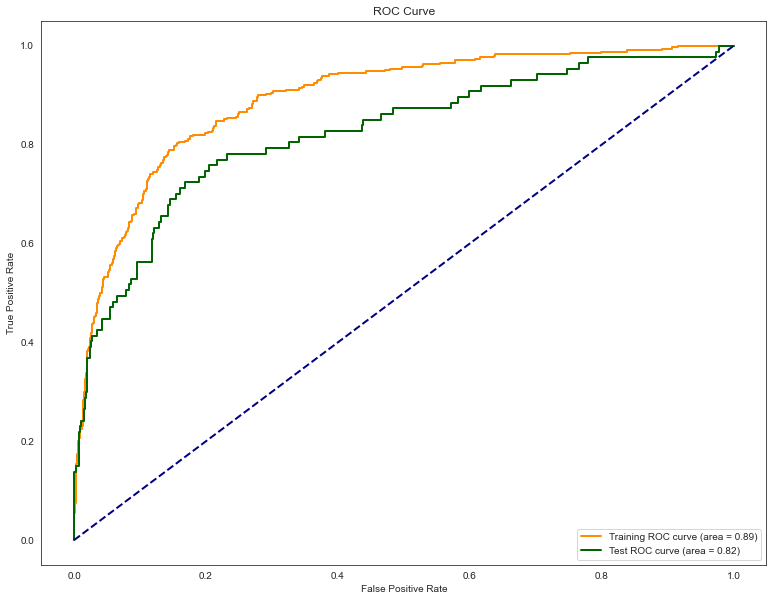

AUC Score (Training): 0.8923251367921419
AUC Score (Test): 0.8237759573252048


In [68]:
# Evaluate the model and get predicted probabilities
y_pred_proba_train = best_model.predict(X_train).flatten()
y_pred_proba_test = best_model.predict(X_test).flatten()

# Calculate ROC curve and AUC for training set
fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_pred_proba_train)
auc_train = metrics.auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for test set
fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_pred_proba_test)
auc_test = metrics.auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(13, 10))

plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Training ROC curve (area = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='darkgreen', lw=2, label=f'Test ROC curve (area = {auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.show()

print("AUC Score (Training):", auc_train)
print("AUC Score (Test):", auc_test)

### Scoring test_new

In [139]:
# Use the trained model to make predictions on the test set
best_model.predict(test_encoded)

35/35 [==============================] - 0s 2ms/step


array([[0.07049263],
       [0.4248016 ],
       [0.02548073],
       ...,
       [0.03754032],
       [0.08159092],
       [0.00051453]], dtype=float32)

In [121]:
e_number = pd.read_csv('/kaggle/input/attrition-dataset/test.csv')['id']
test_predictions = best_model.predict(test_encoded)

output = pd.DataFrame({
    'id': e_number, 'Attrition': test_predictions.flatten()
})
output.to_csv('submission_nn.csv', index=False)
print('Successful')

35/35 [==============================] - 0s 1ms/step
Successful


### Model Two

In [54]:
# Define the input layer
inputs = layers.Input(shape=(X_train.shape[1],))

# Normalize the features
normalized_features = layers.BatchNormalization()(inputs)

# Add hidden layers with L2 regularization, Dropout regularization, and Leaky ReLU activation
hidden1 = layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001))(normalized_features)
dropout1 = layers.Dropout(0.2)(hidden1)

hidden2 = layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001))(dropout1)
dropout2 = layers.Dropout(0.2)(hidden2)

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(dropout2)

# Define the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model with AdamW optimizer
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model using early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)
model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
print('\nROC AUC score on Test Set:', roc_auc)

# Evaluate the model on the train set
y_pred_train = model.predict(X_train)
roc_auc_train = roc_auc_score(y_train, y_pred_train)
print('\nROC AUC score on Train Set:', roc_auc_train)

Epoch 1/100
63/63 [==============================] - 12s 29ms/step - loss: 0.5460 - accuracy: 0.8291 - val_loss: 0.4836 - val_accuracy: 0.8512
Epoch 2/100
63/63 [==============================] - 0s 7ms/step - loss: 0.4519 - accuracy: 0.8644 - val_loss: 0.4473 - val_accuracy: 0.8492
Epoch 3/100
63/63 [==============================] - 0s 6ms/step - loss: 0.4262 - accuracy: 0.8728 - val_loss: 0.4201 - val_accuracy: 0.8492
Epoch 4/100
63/63 [==============================] - 1s 9ms/step - loss: 0.4108 - accuracy: 0.8738 - val_loss: 0.4066 - val_accuracy: 0.8591
Epoch 5/100
63/63 [==============================] - 0s 7ms/step - loss: 0.3865 - accuracy: 0.8833 - val_loss: 0.3990 - val_accuracy: 0.8631
Epoch 6/100
63/63 [==============================] - 1s 8ms/step - loss: 0.3737 - accuracy: 0.8862 - val_loss: 0.3971 - val_accuracy: 0.8710
Epoch 7/100
63/63 [==============================] - 0s 5ms/step - loss: 0.3707 - accuracy: 0.8897 - val_loss: 0.3963 - val_accuracy: 0.8770
Epoch 8/100

In [123]:
# # Evaluate the model on the test set and obtain predicted probabilities
# y_pred_proba = model.predict(X_test_scaled)

# # Extract probabilities for the positive class
# positive_class_probs = y_pred_proba.flatten()
# print(positive_class_probs[:20])
# print()
# print()
# print(f'AUC ROC Score: {roc_auc_score(y_test, positive_class_probs)}')

### Scoring test_new

In [127]:
# Use the trained model to make predictions on the test set
model.predict(test_new)

35/35 [==============================] - 0s 3ms/step


array([[0.06831826],
       [0.449442  ],
       [0.04820798],
       ...,
       [0.13585924],
       [0.04825991],
       [0.00076889]], dtype=float32)

In [178]:
test_predictions.flatten()

array([0.13049874, 0.250262  , 0.02789105, ..., 0.08890038, 0.11594759,
       0.00735061], dtype=float32)

In [116]:
e_number = pd.read_csv('/kaggle/input/attrition-dataset/test.csv')['id']
test_predictions = model.predict(test_new)

output = pd.DataFrame({
    'id': e_number, 'Attrition': test_predictions.flatten()
})
output.to_csv('submission_nn.csv', index=False)
print('Successful')

NameError: name 'test_new' is not defined

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(drop='first', sparse=False)
# train_encoded = encoder.fit_transform(train_df[['JobRole', 'Gender', 'EducationField', 'Department', 'OverTime', 'BusinessTravel']])
# test_encoded = encoder.transform(test_df[['JobRole', 'Gender', 'EducationField', 'Department', 'OverTime', 'BusinessTravel']])

# train_df_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(['JobRole', 'Gender', 'EducationField', 'Department', 'OverTime', 'BusinessTravel']))
# test_df_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(['JobRole', 'Gender', 'EducationField', 'Department', 'OverTime', 'BusinessTravel']))

# train_df_encoded = train_df_encoded.astype(int)
# test_df_encoded = test_df_encoded.astype(int)
# display(train_df_encoded.head(), test_df_encoded.head())

In [ ]:
# numerical_columns_train = train_df.select_dtypes(include='number').columns.tolist()
# numerical_columns_test = test_df.select_dtypes(include='number').columns.tolist()

# # Extract numerical features from the original datasets
# train_df_num = train_df[numerical_columns_train]
# test_df_num = test_df[numerical_columns_test]

# # Concatenate numerical features with the one-hot encoded categorical columns
# train_new = pd.concat([train_df_num, train_df_encoded], axis=1)
# test_new = pd.concat([test_df_num, test_df_encoded], axis=1)
# display(train_new.head(), test_new.head())

# X[X.select_dtypes('object').columns].nunique().reset_index(name='cardinality')